# example to calculate finite temperature (300K) force constants using dynaphopy (quasiparticle theory)

In [1]:
from phonolammps import Phonolammps
from dynaphopy.interface.lammps_link import generate_lammps_trajectory
from dynaphopy.interface.phonopy_link import ForceConstants
from dynaphopy import Quasiparticle
from dynaphopy.atoms import Structure

In [2]:
import numpy as np

In [3]:
phlammps = Phonolammps('in.lammps',
                       supercell_matrix=np.diag([2, 2, 2]),
                       primitive_matrix=[[0.0, 0.5, 0.5],
                                         [0.5, 0.0, 0.5],
                                         [0.5, 0.5, 0.0]],
                       )

Seekpath not installed. Autopath is deactivated


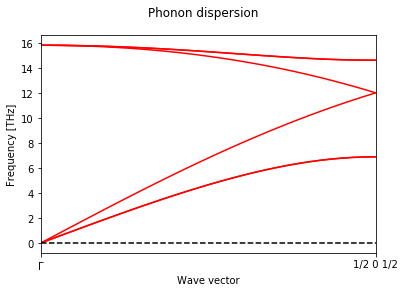

In [4]:
phlammps.plot_phonon_dispersion_bands()

In [5]:
force_constants = phlammps.get_force_constants()

In [6]:
# Print harmonic force constants
print('harmonic force constants')
print(force_constants)

harmonic force constants
[[[[ 1.53167307e+01  1.11919641e-29  6.53275437e-31]
   [ 2.76101317e-30  1.53167307e+01  1.77493704e-30]
   [ 1.08468374e-29 -2.76101317e-30  1.53167307e+01]]

  [[-2.57571742e-12  3.20474743e-31  1.84889275e-30]
   [ 1.10440527e-29 -8.88178420e-13  9.86076132e-30]
   [ 1.12018249e-28  7.09974815e-30 -8.88178420e-13]]

  [[-8.88178420e-13  9.89157619e-29  4.65427934e-29]
   [ 2.76101317e-30 -2.57571742e-12 -2.76101317e-30]
   [ 1.53827877e-29 -1.10440527e-29 -8.88178420e-13]]

  ...

  [[ 9.50316690e-13 -7.27716498e-14  7.27716498e-14]
   [ 1.36869682e-13  2.72198563e-13 -2.62637134e-13]
   [-1.36869682e-13 -2.62637134e-13  2.72198563e-13]]

  [[ 2.72198563e-13  1.36869682e-13 -2.62637134e-13]
   [-7.27716498e-14  9.50316690e-13  7.27716498e-14]
   [-2.62637134e-13 -1.36869682e-13  2.72198563e-13]]

  [[ 1.34010273e-12  1.18828558e-14 -3.79470760e-13]
   [ 1.18828558e-14  1.34010273e-12 -3.79470760e-13]
   [-1.33226763e-13 -1.33226763e-13 -4.17955736e-14]]]




In [7]:
structure = phlammps.get_unitcell()

In [8]:
# define structure for dynaphopy
dp_structure = Structure(cell=structure.get_cell(),  # cell_matrix, lattice vectors in rows
                         scaled_positions=structure.get_scaled_positions(),
                         atomic_elements=structure.get_chemical_symbols(),
                         primitive_matrix=phlammps.get_primitve_matrix(),
                         force_constants=ForceConstants(force_constants,
                                                        supercell=phlammps.get_supercell_matrix()))

In [9]:
# calculate trajectory for dynaphopy with lammps
trajectory = generate_lammps_trajectory(dp_structure, 'in.lammps',
                                        total_time=20,      # ps
                                        time_step=0.001,    # ps
                                        relaxation_time=5,  # ps
                                        silent=False,
                                        supercell=[2, 2, 2],
                                        memmap=False,
                                        velocity_only=True,
                                        temperature=300)

Temperature reset to 300 (NVT)
Set lammps initial velocities
lammps: [##############################] 100.00% Done...


In [10]:
# set dynaphopy calculation
calculation = Quasiparticle(trajectory)
calculation.select_power_spectra_algorithm(2)  # select FFT algorithm

Using 20000 steps
Using Fast Fourier transform (Numpy) function


In [11]:
calculation.get_renormalized_phonon_dispersion_bands()
renormalized_force_constants = calculation.get_renormalized_force_constants()

set frequency range: 0.0 - 20.950000000000003

Q-point: 1 / 32      [0. 0. 0.]
Harmonic frequencies (THz):
[-4.94629527e-06 -4.93914386e-06 -4.93693491e-06  1.58573462e+01
  1.58573462e+01  1.58573462e+01]
Calculating phonon projection power spectra
Projecting into phonon mode
Projecting into wave vector
MD cell size relation: [2 2 2]
FFT: [##############################] 100.00% Done...

Peak # 1
----------------------------------------------
Width                             0.030060 THz
Position                          0.010308 THz
Area (<K>)    (Lorentzian)        0.000000 eV
Area (<K>)    (Total)             0.000000 eV
<|dQ/dt|^2>                       0.000000 eV
Occupation number                -0.500000
Fit temperature                        nan K
Base line                         0.000000 eV * ps
Maximum height                    0.000000 eV * ps
Fitting global error       114759014236.489044
Frequency shift                   0.010313 THz

Peak # 2
--------------------------

FFT: [##############################] 100.00% Done...
Projecting into phonon mode
Projecting into wave vector
Harmonic frequencies (THz):
[ 6.90822293  6.90822293 12.03891013 12.03891013 14.65463773 14.65463773]
FFT: [##############################] 100.00% Done...
Projecting into phonon mode
Projecting into wave vector
Harmonic frequencies (THz):
[ 6.90822293  6.90822293 12.03891013 12.03891013 14.65463773 14.65463773]
FFT: [##############################] 100.00% Done...
Harmonic frequencies (THz):
[ 6.90822293  6.90822293 12.03891013 12.03891013 14.65463773 14.65463773]

Peak # 1
----------------------------------------------
Width                             0.041712 THz
Position                          6.798868 THz
Area (<K>)    (Lorentzian)        0.013967 eV
Area (<K>)    (Total)             0.019799 eV
<|dQ/dt|^2>                       0.027933 eV
Occupation number                 5.741967
Fit temperature                 323.459220 K
Base line                         0.000176 

Harmonic frequencies (THz):
[ 4.66414687  4.66414687  6.81385475 14.97446007 15.33670184 15.33670184]
Skipped, equivalent to [0.   0.25 0.25]

Q-point: 6 / 32      [0.25 0.25 0.5 ]
Harmonic frequencies (THz):
[ 4.68162319  6.93879447  8.91017241 13.54300608 15.20403699 15.35207287]
Calculating phonon projection power spectra
Projecting into phonon mode
Projecting into wave vector
FFT: [##############################] 100.00% Done...
Projecting into phonon mode
Projecting into wave vector
Harmonic frequencies (THz):
[ 4.68162319  6.93879447  8.91017241 13.54300608 15.20403699 15.35207287]
FFT: [##############################] 100.00% Done...
Projecting into phonon mode
Projecting into wave vector
Harmonic frequencies (THz):
[ 4.68162319  6.93879447  8.91017241 13.54300608 15.20403699 15.35207287]
FFT: [##############################] 100.00% Done...
Harmonic frequencies (THz):
[ 4.68162319  6.93879447  8.91017241 13.54300608 15.20403699 15.35207287]

Peak # 1
---------------------------

Harmonic frequencies (THz):
[ 4.68162319  6.93879447  8.91017241 13.54300608 15.20403699 15.35207287]
Calculating phonon projection power spectra
Projecting into phonon mode
Projecting into wave vector
FFT: [##############################] 100.00% Done...
Projecting into phonon mode
Projecting into wave vector
Harmonic frequencies (THz):
[ 4.68162319  6.93879447  8.91017241 13.54300608 15.20403699 15.35207287]
FFT: [##############################] 100.00% Done...
Projecting into phonon mode
Projecting into wave vector
Harmonic frequencies (THz):
[ 4.68162319  6.93879447  8.91017241 13.54300608 15.20403699 15.35207287]
FFT: [##############################] 100.00% Done...
Projecting into phonon mode
Projecting into wave vector
Harmonic frequencies (THz):
[ 4.68162319  6.93879447  8.91017241 13.54300608 15.20403699 15.35207287]
FFT: [##############################] 100.00% Done...
Projecting into phonon mode
Projecting into wave vector
Harmonic frequencies (THz):
[ 4.68162319  6.93879447

FFT: [##############################] 100.00% Done...
Projecting into phonon mode
Projecting into wave vector
Harmonic frequencies (THz):
[ 4.68162319  4.68162319 11.23053228 12.93955194 15.20403699 15.20403699]
FFT: [##############################] 100.00% Done...
Projecting into phonon mode
Projecting into wave vector
Harmonic frequencies (THz):
[ 4.68162319  4.68162319 11.23053228 12.93955194 15.20403699 15.20403699]
FFT: [##############################] 100.00% Done...
Harmonic frequencies (THz):
[ 4.68162319  4.68162319 11.23053228 12.93955194 15.20403699 15.20403699]

Peak # 1
----------------------------------------------
Width                             0.035974 THz
Position                          4.610672 THz
Area (<K>)    (Lorentzian)        0.007627 eV
Area (<K>)    (Total)             0.010375 eV
<|dQ/dt|^2>                       0.015253 eV
Occupation number                 4.526181
Fit temperature                 176.423549 K
Base line                         0.000122 

TypeError: set_dynamical_matrices() takes 2 positional arguments but 3 were given

In [ ]:
# Print phonon band structure
calculation.plot_renormalized_phonon_dispersion_bands()

In [ ]:
# Print renormalized force constants
print('renormalized force constants at 300K')
print(renormalized_force_constants.get_array())